In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)
raw = pd.read_csv("../data/MULTI_socio_demo_9_raw.csv")

In [3]:
raw.head()

,essround,idno,cntry,prtvede1,prtvtdfr,prtvtfhu,prtvtcit,prtvtdpl,agea,domicil,eduyrs,mainact,hincsrca,hinctnta,hincfel,iincsrc,Unnamed: 16
0,9,17,AT,NaN,NaN,NaN,NaN,NaN,43,4,12,66,1,3,3,66,NaN
1,9,31,AT,NaN,NaN,NaN,NaN,NaN,85,4,8,66,4,2,1,66,NaN
2,9,58,AT,NaN,NaN,NaN,NaN,NaN,31,3,11,66,1,8,2,1,NaN
3,9,69,AT,NaN,NaN,NaN,NaN,NaN,49,4,12,66,1,88,2,66,NaN
4,9,98,AT,NaN,NaN,NaN,NaN,NaN,67,4,12,66,4,5,2,4,NaN


In [4]:
countries = ["DE","FR","IT","HU","PL"]

In [5]:
raw2 = raw[raw["cntry"].isin(countries)].drop(columns='Unnamed: 16')

In [6]:
cols = {'essround':'round',
        'cntry':'country',
        'agea':'age',
        'domicil':'urban',
        'eduyrs':'education(yy)',
        'mainact':'activity', 
        'hincsrca':'source_inc_h',
        'hinctnta':'income',
        'hincfel':'satisfaction_inc',
        'iincsrc':'source_inc_p',
        'prtvede1':'party_de',
        'prtvtdfr':'party_fr', 
        'prtvtfhu':'party_hu',
        'prtvtcit':'party_it',
        'prtvtdpl':'party_pl'}

In [7]:
multi = raw2.rename(columns=cols).reset_index(drop=True)

In [62]:
multi[['party_de',
       'party_fr',
       'party_it',
       'party_hu',
       'party_pl']] = multi[['party_de',
                             'party_fr',
                             'party_it',
                             'party_hu',
                             'party_pl']].fillna(value=0).astype(int)

In [63]:
#age_group: 1:'18-24', 2:'25-65', 3:'+65'
multi=multi.assign(age_group=np.where(multi['age'].lt(25),'18-24',np.where(multi['age'].lt(66),'25-65','66+')))

In [65]:
multi.head()

,round,idno,country,party_de,party_fr,party_hu,party_it,party_pl,age,urban,education(yy),activity,source_inc_h,income,satisfaction_inc,source_inc_p,age_group
0,9,1,DE,4,0,0,0,0,49,3,17,66,2,10,2,2,25-65
1,9,63,DE,66,0,0,0,0,24,3,15,66,1,4,3,66,18-24
2,9,108,DE,66,0,0,0,0,24,3,14,4,5,9,3,5,18-24
3,9,117,DE,1,0,0,0,0,57,3,12,6,4,3,1,66,25-65
4,9,134,DE,1,0,0,0,0,40,3,18,66,1,7,2,1,25-65


### We want to analyse the socio-economic profile of far-right voters and compare it to non far-right voters. We start by slicing our data frame into subsets for each country and group: country_f (people who voted the main far-right party in the country), country_nf(people who voted other parties)

#### DE

In [11]:
de_sode = multi[multi['country']== 'DE']

In [12]:
de_f = de_sode[de_sode["party_de"] == 6].drop(columns=['party_fr',
                                                       'party_it',
                                                       'party_pl',
                                                       'party_hu']).reset_index(drop=True)

In [13]:
de_nf = (de_sode[~de_sode["party_de"]
                 .isin([6,66,77,88,99])]
         .drop(columns=['party_fr','party_it','party_pl','party_hu'])
         .reset_index(drop=True))

#### FR

In [14]:
fr_sode = multi[multi['country']== 'FR']

In [15]:
fr_f = fr_sode[fr_sode["party_fr"] == 11].drop(columns=['party_de',
                                                        'party_it',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)

In [16]:
fr_nf = (fr_sode[~fr_sode["party_fr"]
                 .isin([11,66,77,88,99])]
         .drop(columns=['party_de','party_it','party_pl','party_hu'])
         .reset_index(drop=True))

#### IT

In [17]:
it_sode = multi[multi['country']== 'IT']

In [18]:
it_f = it_sode[it_sode["party_it"] == 9].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)

In [19]:
it_nf = (it_sode[~it_sode["party_it"]
                 .isin([9,66,77,88,99])]
         .drop(columns=['party_de','party_fr','party_pl','party_hu'])
         .reset_index(drop=True))

In [20]:
it_nf = it_nf[it_nf['age']!= 999]

#### PL

In [21]:
pl_sode = multi[multi['country']== 'PL']

In [22]:
pl_f = pl_sode[pl_sode["party_pl"] == 6].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_it']).reset_index(drop=True)

In [23]:
pl_nf = (pl_sode[~pl_sode["party_pl"]
                 .isin([6,66,77,88,99])]
         .drop(columns=['party_de','party_fr','party_it','party_hu'])
         .reset_index(drop=True))

#### HU

In [24]:
hu_sode = multi[multi['country']== 'HU']

In [25]:
hu_f = hu_sode[hu_sode["party_hu"] == 3].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_pl',
                                                        'party_it']).reset_index(drop=True)

In [26]:
hu_nf = (hu_sode[~hu_sode["party_hu"]
                 .isin([3,66,77,88,99])]
         .drop(columns=['party_de','party_fr','party_it','party_pl'])
         .reset_index(drop=True))

### Age
#### DE

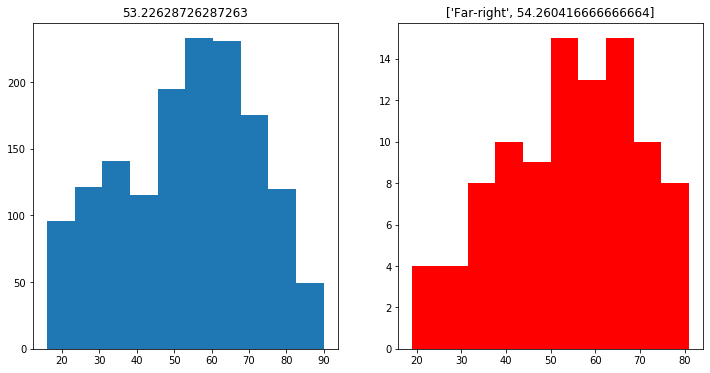

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nf['age']);
axes[1].hist(de_f['age'], color='r');
axes[0].set_title(de_nf['age'].mean());
axes[1].set_title(['Far-right',de_f['age'].mean()]);

#### FR

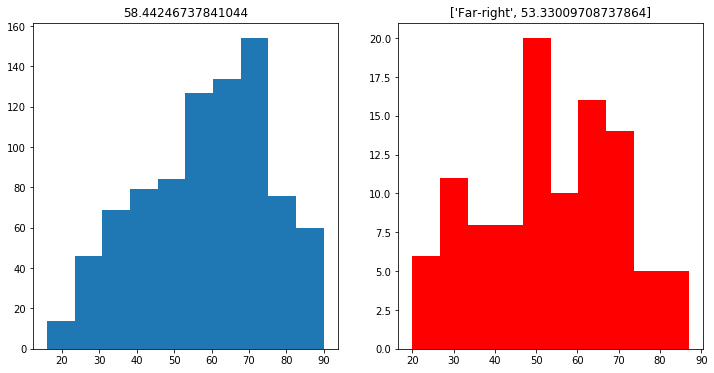

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nf['age']);
axes[1].hist(fr_f['age'], color='r');
axes[0].set_title(fr_nf['age'].mean());
axes[1].set_title(['Far-right',fr_f['age'].mean()]);

#### IT

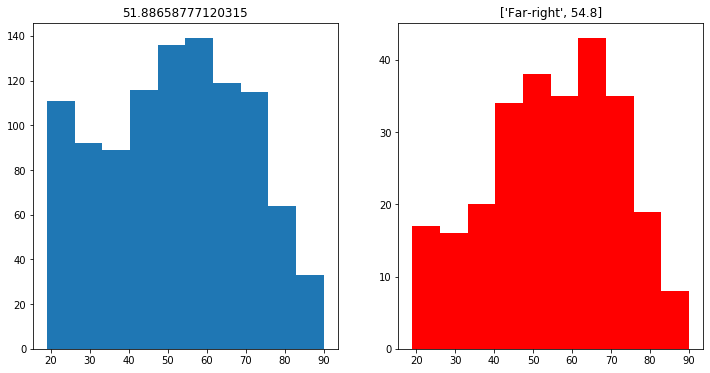

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nf['age']);
axes[1].hist(it_f['age'], color='r');
axes[0].set_title(it_nf['age'].mean());
axes[1].set_title(['Far-right',it_f['age'].mean()]);

#### PL

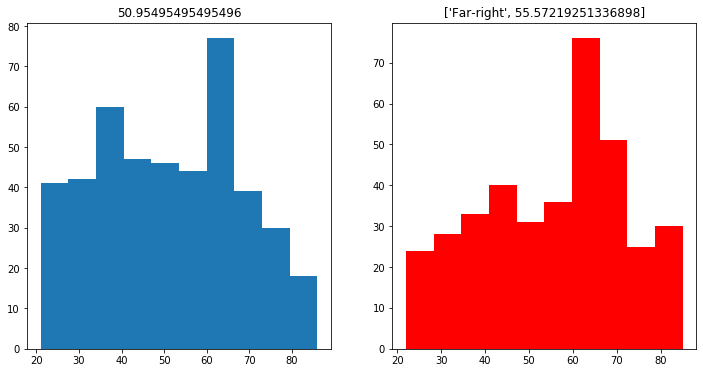

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nf['age']);
axes[1].hist(pl_f['age'], color='r');
axes[0].set_title(pl_nf['age'].mean());
axes[1].set_title(['Far-right',pl_f['age'].mean()]);

#### HU

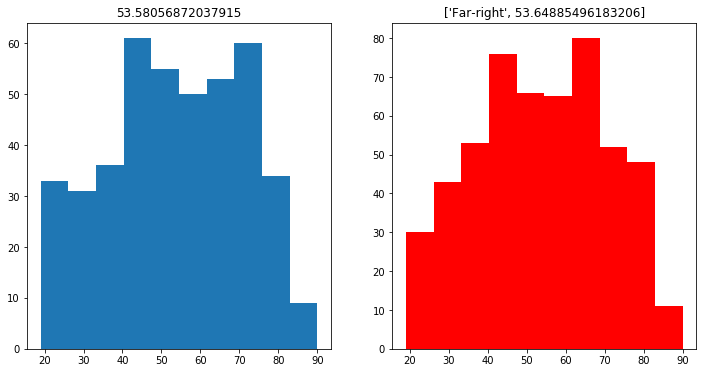

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nf['age']);
axes[1].hist(hu_f['age'], color='r');
axes[0].set_title(hu_nf['age'].mean());
axes[1].set_title(['Far-right',hu_f['age'].mean()]);

### Urban 
##### 1: A big city , 2: Suburbs or outskirts of a big city, 3: Town or small city, 4: Country village, 5: Farm or home in countryside

#### DE

In [117]:
de_nf_urban = de_nf.groupby('urban').agg({'idno':'count'}).reset_index()

In [118]:
de_f_urban = de_f.groupby('urban').agg({'idno':'count'}).reset_index()

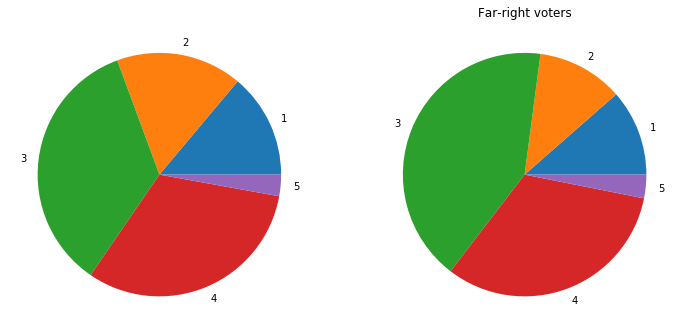

In [122]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(de_nf_urban['idno'],labels=(de_nf_urban['urban'].to_list()));
axes[1].pie(de_f_urban['idno'],labels=(de_f_urban['urban'].to_list()));
axes[1].set_title('Far-right voters');

#### FR

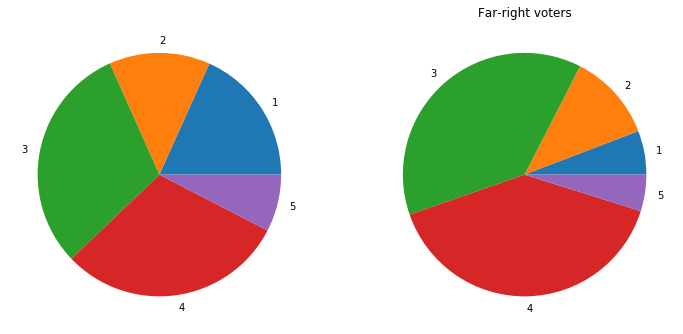

In [123]:
fr_nf_urban = fr_nf.groupby('urban').agg({'idno':'count'}).reset_index()
fr_f_urban = fr_f.groupby('urban').agg({'idno':'count'}).reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(fr_nf_urban['idno'],labels=(fr_nf_urban['urban'].to_list()));
axes[1].pie(fr_f_urban['idno'],labels=(fr_f_urban['urban'].to_list()));
axes[1].set_title('Far-right voters');

#### IT

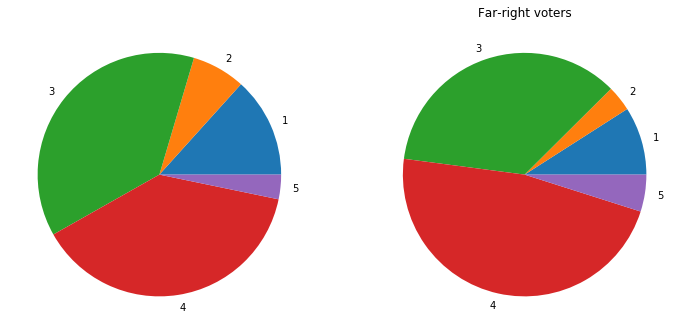

In [124]:
it_nf_urban = it_nf.groupby('urban').agg({'idno':'count'}).reset_index()
it_f_urban = it_f.groupby('urban').agg({'idno':'count'}).reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(it_nf_urban['idno'],labels=(it_nf_urban['urban'].to_list()));
axes[1].pie(it_f_urban['idno'],labels=(it_f_urban['urban'].to_list()));
axes[1].set_title('Far-right voters');

#### PL

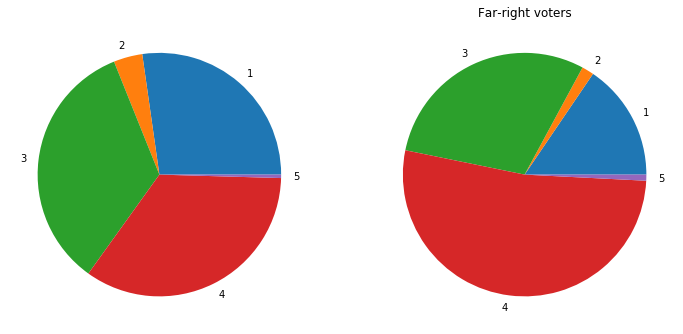

In [125]:
pl_nf_urban = pl_nf.groupby('urban').agg({'idno':'count'}).reset_index()
pl_f_urban = pl_f.groupby('urban').agg({'idno':'count'}).reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(pl_nf_urban['idno'],labels=(pl_nf_urban['urban'].to_list()));
axes[1].pie(pl_f_urban['idno'],labels=(pl_f_urban['urban'].to_list()));
axes[1].set_title('Far-right voters');

#### HU

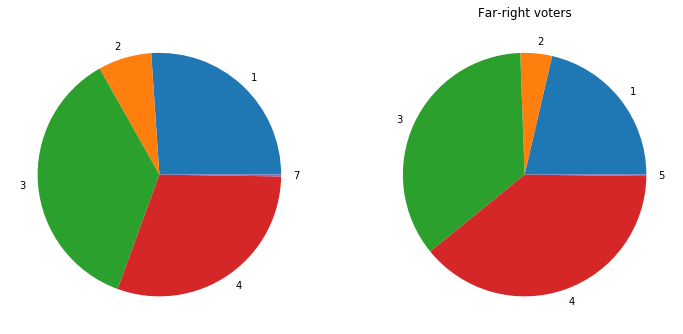

In [126]:
hu_nf_urban = hu_nf.groupby('urban').agg({'idno':'count'}).reset_index()
hu_f_urban = hu_f.groupby('urban').agg({'idno':'count'}).reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(hu_nf_urban['idno'],labels=(hu_nf_urban['urban'].to_list()));
axes[1].pie(hu_f_urban['idno'],labels=(hu_f_urban['urban'].to_list()));
axes[1].set_title('Far-right voters');

### Years of full-time education completed

#### DE

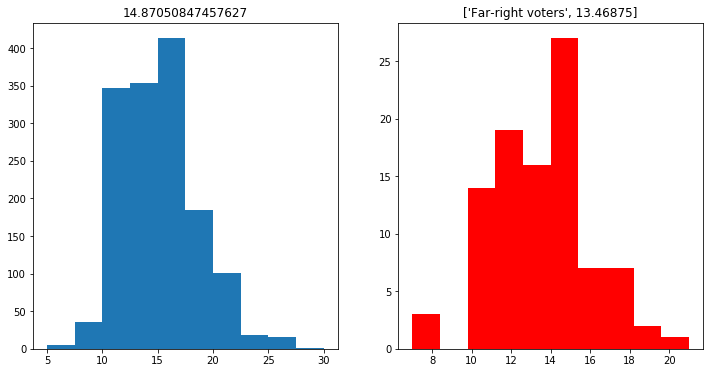

In [132]:
de_ed_f = de_f[~de_f['education(yy)'].isin([66,77,88,99])]
de_ed_nf = de_nf[~de_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_ed_nf['education(yy)']);
axes[1].hist(de_ed_f['education(yy)'], color='r');
axes[0].set_title(de_ed_nf['education(yy)'].mean());
axes[1].set_title(["Far-right voters",de_ed_f['education(yy)'].mean()]);

#### FR

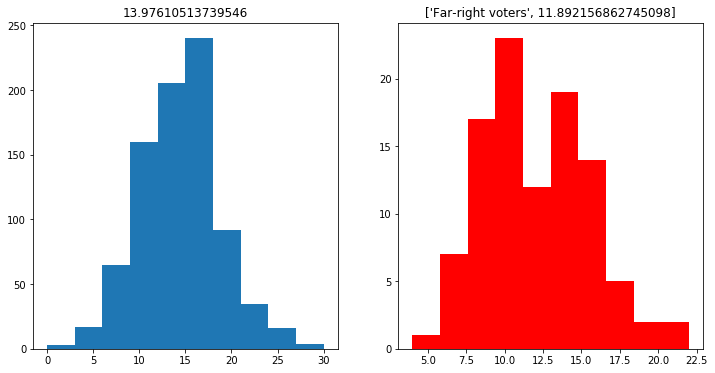

In [135]:
fr_ed_f = fr_f[~fr_f['education(yy)'].isin([66,77,88,99])]
fr_ed_nf = fr_nf[~fr_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_ed_nf['education(yy)']);
axes[1].hist(fr_ed_f['education(yy)'], color='r');
axes[0].set_title(fr_ed_nf['education(yy)'].mean());
axes[1].set_title(["Far-right voters",fr_ed_f['education(yy)'].mean()]);

#### IT

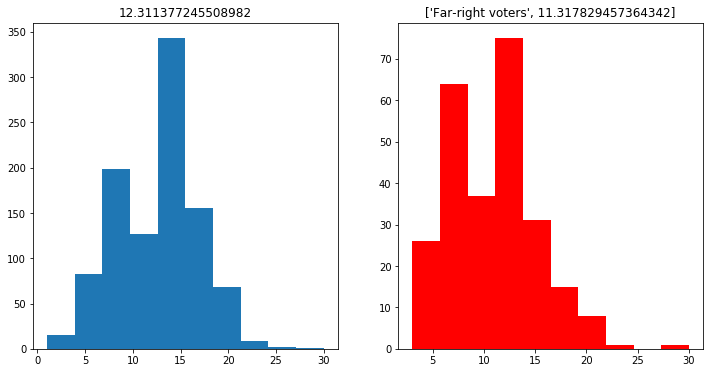

In [136]:
it_ed_f = it_f[~it_f['education(yy)'].isin([66,77,88,99])]
it_ed_nf = it_nf[~it_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_ed_nf['education(yy)']);
axes[1].hist(it_ed_f['education(yy)'], color='r');
axes[0].set_title(it_ed_nf['education(yy)'].mean());
axes[1].set_title(["Far-right voters",it_ed_f['education(yy)'].mean()]);

#### PL

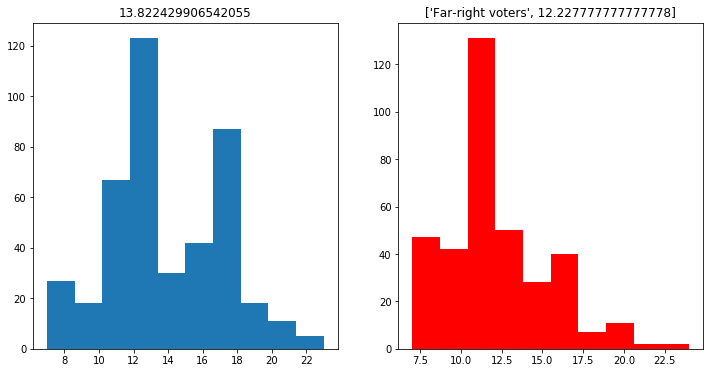

In [137]:
pl_ed_f = pl_f[~pl_f['education(yy)'].isin([66,77,88,99])]
pl_ed_nf = pl_nf[~pl_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_ed_nf['education(yy)']);
axes[1].hist(pl_ed_f['education(yy)'], color='r');
axes[0].set_title(pl_ed_nf['education(yy)'].mean());
axes[1].set_title(["Far-right voters",pl_ed_f['education(yy)'].mean()]);

#### HU

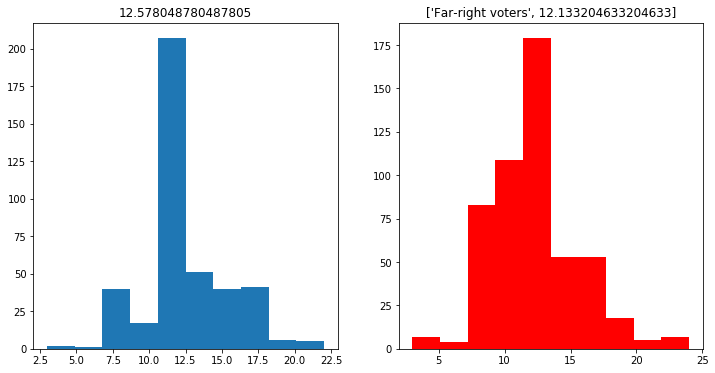

In [138]:
hu_ed_f = hu_f[~hu_f['education(yy)'].isin([66,77,88,99])]
hu_ed_nf = hu_nf[~hu_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_ed_nf['education(yy)']);
axes[1].hist(hu_ed_f['education(yy)'], color='r');
axes[0].set_title(hu_ed_nf['education(yy)'].mean());
axes[1].set_title(["Far-right voters",hu_ed_f['education(yy)'].mean()]);

### Main activitiy in the last 7 days --> 1:Paid work, 2:Education, 3:Unemployed(looking for job), 4:Unemployed(not looking for job), 5:Permanently sick or disabled, 6:Retired, 7:Community or military service, 8: Housework, 9:Other

In [87]:
#Most people replied '66:not applicable'
#DE:(63/96)
#FR:(98/103)
#IT:(261/265)
#PL:(354/374)
#HU:(506/524)

### Household´s total income
##### 1: 1st decile (lowest decile) - 10: 10th decile (highest decile)

#### DE

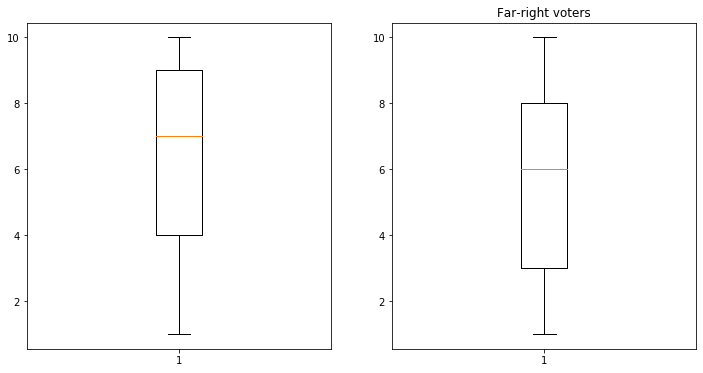

In [143]:
de_in_f = de_f[~de_f['income'].isin([66,77,88,99])]
de_in_nf = de_nf[~de_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(de_in_nf['income']);
axes[1].boxplot(de_in_f['income']);
axes[1].set_title("Far-right voters");

#### FR

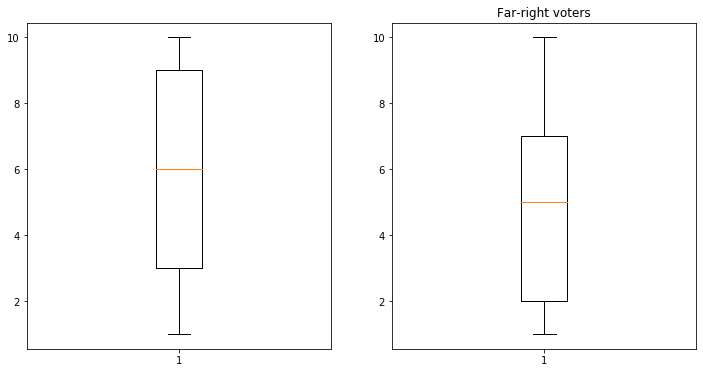

In [144]:
fr_in_f = fr_f[~fr_f['income'].isin([66,77,88,99])]
fr_in_nf = fr_nf[~fr_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(fr_in_nf['income']);
axes[1].boxplot(fr_in_f['income']);
axes[1].set_title("Far-right voters");

#### IT

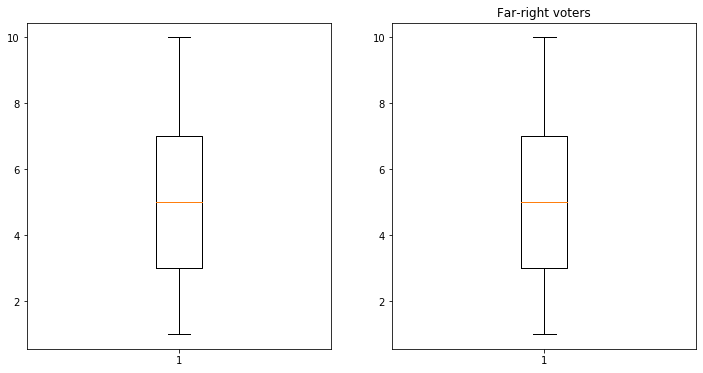

In [145]:
it_in_f = it_f[~it_f['income'].isin([66,77,88,99])]
it_in_nf = it_nf[~it_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(it_in_nf['income']);
axes[1].boxplot(it_in_f['income']);
axes[1].set_title("Far-right voters");

#### PL

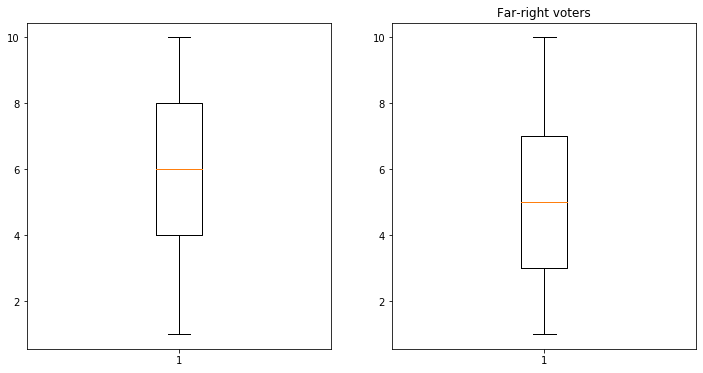

In [146]:
pl_in_f = pl_f[~pl_f['income'].isin([66,77,88,99])]
pl_in_nf = pl_nf[~pl_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(pl_in_nf['income']);
axes[1].boxplot(pl_in_f['income']);
axes[1].set_title("Far-right voters");

#### HU

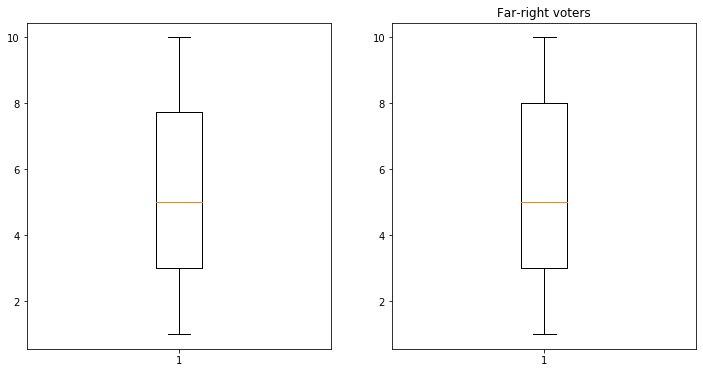

In [147]:
hu_in_f = hu_f[~hu_f['income'].isin([66,77,88,99])]
hu_in_nf = hu_nf[~hu_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(hu_in_nf['income']);
axes[1].boxplot(hu_in_f['income']);
axes[1].set_title("Far-right voters");
# Most people decided not to answer (195/524)

### Feeling abouts household´s income nowadays (satisfaction_inc)
##### 1: Living comfortably on present income, 2: Coping on present income, 3: Difficult on present income, 4: Very difficult on present income, 7: Refusal, 8: Don´t know, 9: No answer

#### DE

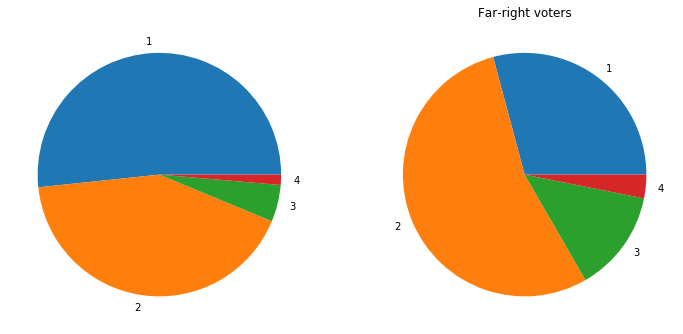

In [152]:
de_nf_sat = de_nf.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
de_nf_sat = de_nf_sat[~de_nf_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
de_f_sat = de_f.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
de_f_sat = de_f_sat[~de_f_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(de_nf_sat['idno'],labels=(de_nf_sat['satisfaction_inc'].to_list()));
axes[1].pie(de_f_sat['idno'],labels=(de_f_sat['satisfaction_inc'].to_list()));
axes[1].set_title('Far-right voters');

#### FR

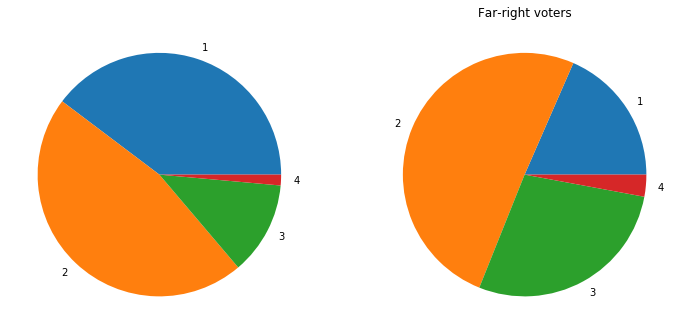

In [153]:
fr_nf_sat = fr_nf.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
fr_nf_sat = fr_nf_sat[~fr_nf_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
fr_f_sat = fr_f.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
fr_f_sat = fr_f_sat[~fr_f_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(fr_nf_sat['idno'],labels=(fr_nf_sat['satisfaction_inc'].to_list()));
axes[1].pie(fr_f_sat['idno'],labels=(fr_f_sat['satisfaction_inc'].to_list()));
axes[1].set_title('Far-right voters');

#### IT

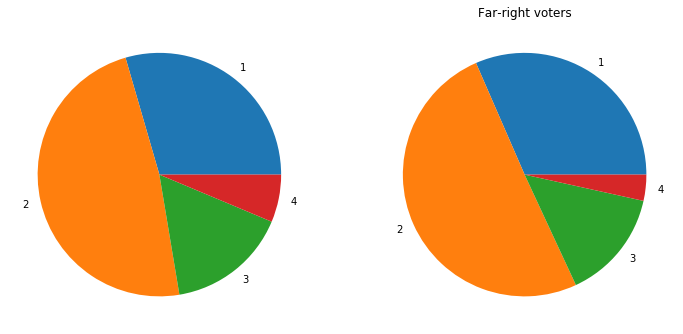

In [155]:
it_nf_sat = it_nf.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
it_nf_sat = it_nf_sat[~it_nf_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
it_f_sat = it_f.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
it_f_sat = it_f_sat[~it_f_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(it_nf_sat['idno'],labels=(it_nf_sat['satisfaction_inc'].to_list()));
axes[1].pie(it_f_sat['idno'],labels=(it_f_sat['satisfaction_inc'].to_list()));
axes[1].set_title('Far-right voters');

#### PL

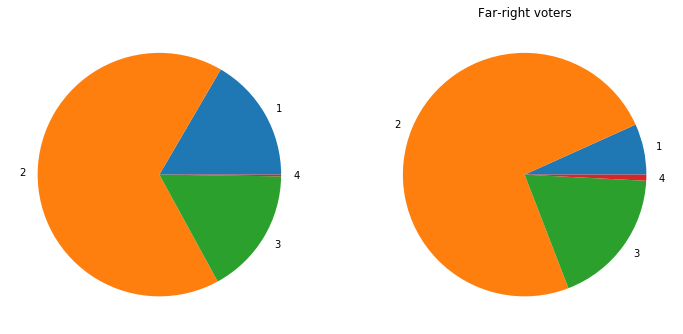

In [157]:
pl_nf_sat = pl_nf.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
pl_nf_sat = pl_nf_sat[~pl_nf_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
pl_f_sat = pl_f.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
pl_f_sat = pl_f_sat[~pl_f_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(pl_nf_sat['idno'],labels=(pl_nf_sat['satisfaction_inc'].to_list()));
axes[1].pie(pl_f_sat['idno'],labels=(pl_f_sat['satisfaction_inc'].to_list()));
axes[1].set_title('Far-right voters');

#### HU

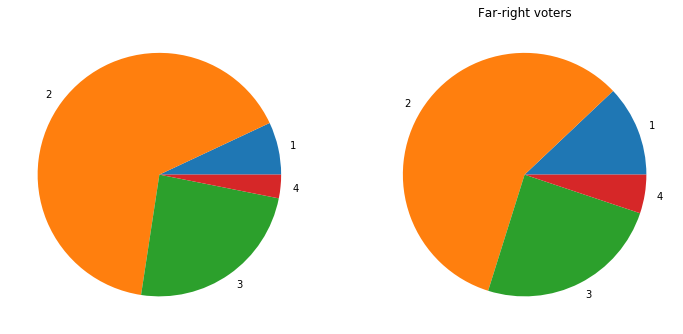

In [158]:
hu_nf_sat = hu_nf.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
hu_nf_sat = hu_nf_sat[~hu_nf_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
hu_f_sat = hu_f.groupby('satisfaction_inc').agg({'idno':'count'}).reset_index()
hu_f_sat = hu_f_sat[~hu_f_sat['satisfaction_inc'].isin([7,8,9])].reset_index()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].pie(hu_nf_sat['idno'],labels=(hu_nf_sat['satisfaction_inc'].to_list()));
axes[1].pie(hu_f_sat['idno'],labels=(hu_f_sat['satisfaction_inc'].to_list()));
axes[1].set_title('Far-right voters');